In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
from shapely.geometry import shape
from shapely.geometry import Polygon

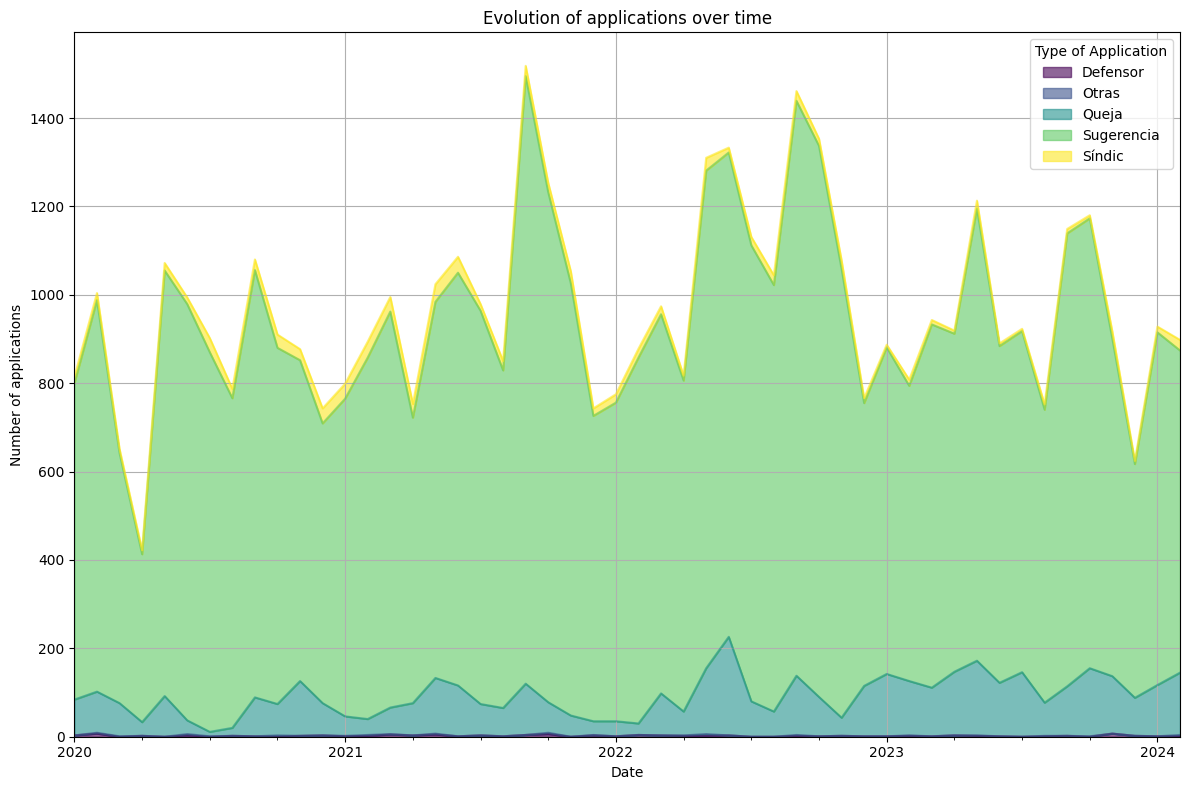

In [5]:
final=pd.read_parquet('quejas-final.parquet')

final['fecha_entrada_ayuntamiento'] = pd.to_datetime(final['fecha_entrada_ayuntamiento'])

df_grouped = final.groupby([final['fecha_entrada_ayuntamiento'].dt.to_period('M'), 'tipo_solicitud']).size().unstack(fill_value=0)
df_grouped.index = df_grouped.index.to_timestamp()

df_grouped.plot(kind='area', figsize=(12, 8), colormap='viridis', alpha=0.6)

plt.xlabel('Date')
plt.ylabel('Number of applications')
plt.title('Evolution of applications over time')
plt.legend(title='Type of Application')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()